In [1]:
import xarray as xr
import glob
MODELINFO=[["ACCESS-ESM1-5",101,249],\
           ["CanESM5",1850,2000],\
           ["CESM2",1,150],\
           ["EC-Earth3-CC",1850,2000],\
           ["FGOALS-g3",370,525],\
           ["MIROC6",3200,3349],\
           ["MRI-ESM2-0",1850,2000],\
           ["NorESM2-LM",1,150],\
           ["NorESM2-MM",1,150],\
           ["GFDL-ESM4",1,150],\
           ["CanESM5-1",101,249],\
           ["CAS-ESM2-0",1850,2000],\
           ["CESM2-WACCM",1850,2000],\
           ["CESM2-WACCM-FV2",370,525],\
           ["E3SM-1-0",3200,3349],\
           ["E3SM-2-0",1850,2000],\
           ["E3SM-2-0-NARRM",1850,2000],\
           ["FGOALS-f3-L",1,150],\
           ["GISS-E2-1-G",1,150],\
           ["AWI-CM-1-1-MR",1850,2000]]

GRIDINFO=[["/pr_day_ACCESS-ESM1-5_1pctCO2_r1i1p1f1_gn_01510101-02001231.nc"],\
          ["/pr_day_CanESM5_1pctCO2_r1i1p1f1_gn_18500101-20001231.nc"],\
          ["/pr_day_CESM2_1pctCO2_r1i1p1f1_gn_00710101-00801231.nc"],\
          ["/pr_day_EC-Earth3-CC_1pctCO2_r1i1p1f1_gr_19080101-19081231.nc"],\
          ["/pr_day_FGOALS-g3_1pctCO2_r1i1p1f1_gn_05160101-05161231.nc"],\
          ["/pr_day_MIROC6_1pctCO2_r1i1p1f1_gn_32800101-32891231.nc"],\
          ["/pr_day_MRI-ESM2-0_1pctCO2_r1i1p1f1_gn_18500101-18991231.nc"],\
          ["/pr_day_NorESM2-LM_1pctCO2_r1i1p1f1_gn_01210101-01301231.nc"],\
          ["/pr_day_NorESM2-MM_1pctCO2_r1i1p1f1_gn_01210101-01301231.nc"]]

MASKINFO=[["/pr_day_ACCESS-ESM1-5_1pctCO2_r1i1p1f1_gn_01510101-02001231.nc"],\
          ["/pr_day_CanESM5_1pctCO2_r1i1p1f1_gn_18500101-20001231.nc"],\
          ["/pr_day_CESM2_1pctCO2_r1i1p1f1_gn_00710101-00801231.nc"],\
          ["/pr_day_EC-Earth3-CC_1pctCO2_r1i1p1f1_gr_19080101-19081231.nc"],\
          ["/pr_day_FGOALS-g3_1pctCO2_r1i1p1f1_gn_05160101-05161231.nc"],\
          ["/pr_day_MIROC6_1pctCO2_r1i1p1f1_gn_32800101-32891231.nc"],\
          ["/pr_day_MRI-ESM2-0_1pctCO2_r1i1p1f1_gn_18500101-18991231.nc"],\
          ["/pr_day_NorESM2-LM_1pctCO2_r1i1p1f1_gn_01210101-01301231.nc"],\
          ["/pr_day_NorESM2-MM_1pctCO2_r1i1p1f1_gn_01210101-01301231.nc"],\
          ["/pr_day_GFDL-ESM4_1pctCO2_r1i1p1f1_gr1_00610101-00801231.nc"],\
          ["/pr_day_GFDL-CM4_1pctCO2_r1i1p1f1_gr1_00210101-00401231.nc"]]
model_names = [model[0] for model in MODELINFO]
model_start = [model[1] for model in MODELINFO]
model_end = [model[2] for model in MODELINFO]
GRID = [model[0] for model in GRIDINFO]
MASK = [model[0] for model in MASKINFO]
lenyear=100
miss_val = -9.99e08
model_names

['ACCESS-ESM1-5',
 'CanESM5',
 'CESM2',
 'EC-Earth3-CC',
 'FGOALS-g3',
 'MIROC6',
 'MRI-ESM2-0',
 'NorESM2-LM',
 'NorESM2-MM',
 'GFDL-ESM4',
 'CanESM5-1',
 'CAS-ESM2-0',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'E3SM-1-0',
 'E3SM-2-0',
 'E3SM-2-0-NARRM',
 'FGOALS-f3-L',
 'GISS-E2-1-G',
 'AWI-CM-1-1-MR']

In [30]:
from sklearn.linear_model import LinearRegression
P_regridded2 = np.full((10, 90, 180), np.nan)
SM_regridded2 = np.full((10, 90, 180), np.nan)
G_regridded2 = np.full((10, 90, 180), np.nan)
SMB_regridded2 = np.full((10, 90, 180), np.nan)
PB_regridded2 = np.full((10, 90, 180), np.nan)
GB_regridded2 = np.full((10, 90, 180), np.nan)

for model in range(10):
    data3 = xr.open_dataset('/scratch/cimes/hh9736/CMIP6_pr/' + model_names[model] + MASK[model])

    G_trend = np.load('/scratch/cimes/hh9736/CMIP6_pr/Temporal_inequality/Trend_GINI_' + model_names[model] + '.npy')
    P_trend = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/Trend_P_' + model_names[model] + '.npy')
    SM_trend = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/Trend_SM_' + model_names[model] + '.npy')

    #GINI_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Temporal_inequality/BaseState_GINI_' + model_names[model] + '.npy')
    P_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/BaseState_P_' + model_names[model] + '.npy')
    SM_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/BaseState_SM_' + model_names[model] + '.npy')
    G_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Temporal_inequality/BaseState_GINI_' + model_names[model] + '.npy')
    
    filename = f'/scratch/cimes/hh9736/CMIP6_pr/Analysis/Spatial_mean_T_ts_' + model_names[model] + '.npy'
    arrT = np.load(filename)
    arrT = arrT[0,:]-arrT[0,0]
    years = np.arange(1, 101).reshape(-1, 1)
    SM_trend[SM_trend==0]=np.nan
    P_trend[P_trend>1000]=np.nan
    P_trend[P_trend<-1000]=np.nan
    SM_trend[0,0:round(SM_trend.shape[1]/6),:]=np.nan
    SM_trend[0,round(5*SM_trend.shape[1]/6):SM_trend.shape[1],:]=np.nan    
    
    # Reshape arrT to a column vector
    arrT_reshaped = arrT.reshape(-1, 1)

    # Create a linear regression model
    model1 = LinearRegression()

    # Fit the model to your data
    model1.fit(years, arrT_reshaped)

    # Get the slope (trend) and intercept of the fitted line
    T_trend = model1.coef_[0][0]
    
    
    lats = data3['lat'].values
    lons = data3['lon'].values-180
    lon_new = np.linspace(-180, 180, 180)
    lat_new = np.linspace(-90, 90, 90)
    # Assuming P is your original 2D numpy array
    # Define the original latitudes and longitudes (lon and lat should be 1D arrays)
    lat_original = lats  # Replace with your original longitudes
    lon_original = lons  # Replace with your original latitudes
    new_grid = xr.Dataset({'lon': (['lon'], lon_new), 'lat': (['lat'], lat_new)})

    data_array = xr.DataArray(P_trend[0,:,:]/T_trend, coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    P_regridded2[model] = regridded_data.values
    
    data_array = xr.DataArray(SM_trend[0,:,:]/T_trend, coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    SM_regridded2[model] = regridded_data.values
    
    data_array = xr.DataArray(G_trend[0,:,:]/T_trend, coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    G_regridded2[model] = regridded_data.values
    
    data_array = xr.DataArray(SM_BaseState[0,:,:], coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    SMB_regridded2[model] = regridded_data.values    
    
    data_array = xr.DataArray(P_BaseState[0,:,:], coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    PB_regridded2[model] = regridded_data.values    

    data_array = xr.DataArray(G_BaseState[0,:,:], coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    GB_regridded2[model] = regridded_data.values    
    

KeyboardInterrupt: 

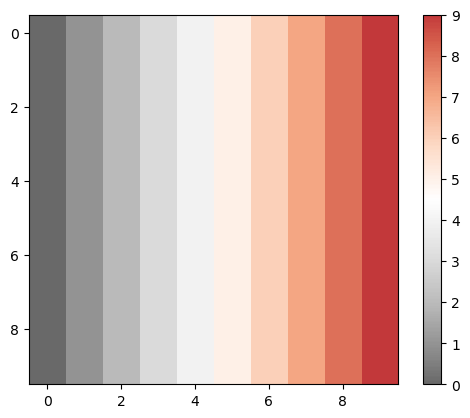

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Get the RdGy_r colormap
rdgy_r = plt.cm.get_cmap('RdGy_r')

# Trim colors at both ends to make it lighter
trim_percent = 15  # Adjust this percentage as needed
trim_length = int(rdgy_r.N * trim_percent / 100)
trimmed_rdgy_r_colors = rdgy_r(np.linspace(trim_length / rdgy_r.N, 1 - trim_length / rdgy_r.N, rdgy_r.N))

# Create a new colormap with trimmed colors
lighter_rdgy_r = LinearSegmentedColormap.from_list('lighter_rdgy_r', trimmed_rdgy_r_colors, N=rdgy_r.N)

# Test the new colormap
data = [[i for i in range(10)] for _ in range(10)]

plt.imshow(data, cmap=lighter_rdgy_r, interpolation='nearest')
plt.colorbar()
plt.show()


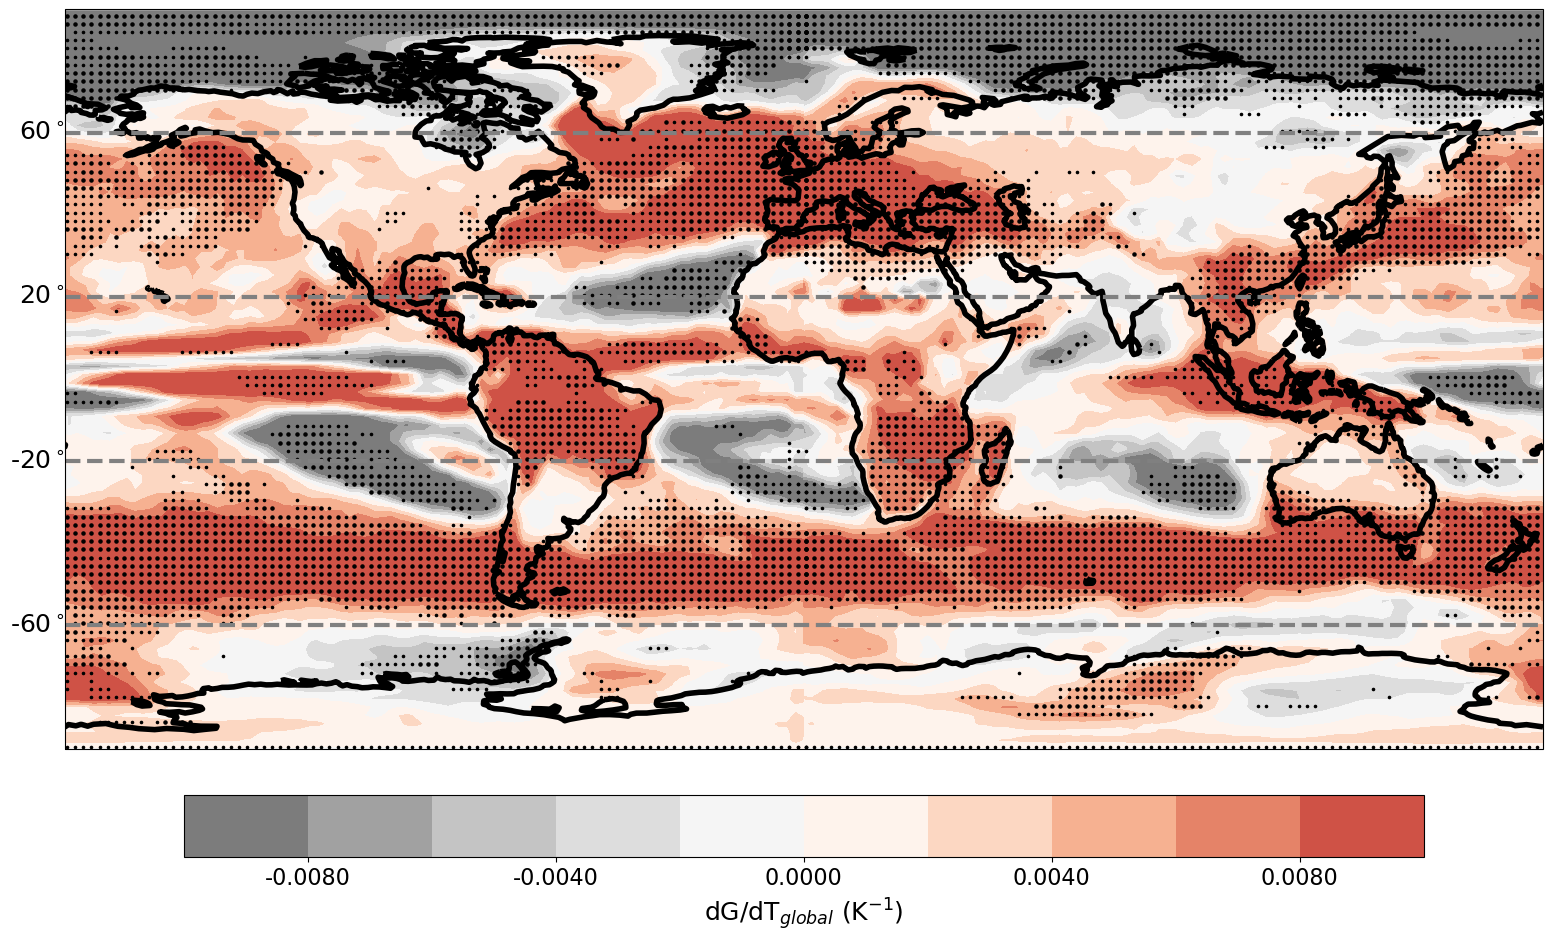

In [6]:
import matplotlib.ticker as ticker
from scipy.stats import ttest_1samp
from scipy.stats import chi2_contingency

dPdT = np.nanmean(G_regridded2, axis=0)
greater_than_zero_matrix = G_regridded2 > 0

# Calculate the fraction of elements > 0 along the first dimension
fraction_matrix = np.mean(greater_than_zero_matrix, axis=0)

projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw=dict(projection=projection))
dPdT[dPdT>.010]=.010
dPdT[dPdT<-.010]=-.010
p_values = np.zeros_like(fraction_matrix)
for i in range(fraction_matrix.shape[0]):
    for j in range(fraction_matrix.shape[1]):
        observed_counts = np.array([np.sum(greater_than_zero_matrix[:, i, j]), np.sum(~greater_than_zero_matrix[:, i, j])])
        expected_counts = np.array([fraction_matrix[i, j] * np.sum(greater_than_zero_matrix[:, i, j]),
                                    fraction_matrix[i, j] * np.sum(~greater_than_zero_matrix[:, i, j])])



        chi_squared_statistic = np.sum((observed_counts - expected_counts)**2 / expected_counts)
        degrees_of_freedom = 1  # for a 2x2 contingency table
        p_value = 1 - stats.chi2.cdf(chi_squared_statistic, degrees_of_freedom)
        
        p_values[i, j] = p_value


# Add coastlines
#dPdT[p_values>0.05]=np.nan
ax.add_feature(cfeature.COASTLINE)
levels = np.linspace(-.01, .01,11) 

# Plot the trend data with statistical significance
lon = np.linspace(0, 360, dPdT.shape[1])
lat = np.linspace(-90, 90, dPdT.shape[0])
lon, lat = np.meshgrid(lon, lat)

dPdT[:,179]=(dPdT[:,0]+dPdT[:,178])/2
fraction_matrix[:,179]=(fraction_matrix[:,0]+fraction_matrix[:,178])/2

#dPdT[:,0]=(dPdT[:,1]+dPdT[:,178])/2
# Plot the trends

#plt.pcolor(lon, lat, dPdT )
im = plt.contourf(lon, lat, dPdT , levels=levels, cmap=lighter_rdgy_r, origin='lower', transform=projection , extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[-0.008, -0.004, 0, 0.004, 0.008])  # Customized ticks

# Enlarge colorbar text size
cbar.ax.tick_params(labelsize=16)

cbar.set_label('dG/dT$_{global}$ (K$^{-1}$)', fontsize=18) 
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=4)  # You can adjust linewidth and edgecolor as desired
cbar.ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))
latitudes = [60, 20, -20, -60]
p_values[np.isnan(p_values)]=0
significant_map = fraction_matrix > 0.9
significant_coordinates = np.argwhere(significant_map)
for coord in significant_coordinates:
    plt.scatter(coord[1]*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
    if coord[1] ==1:
        plt.scatter(0*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
        plt.scatter(180*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
    if coord[1] ==177:
        plt.scatter(178*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
        plt.scatter(179*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
        
significant_map = fraction_matrix < 0.1
significant_coordinates = np.argwhere(significant_map)
for coord in significant_coordinates:
    plt.scatter(coord[1]*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
    if coord[1] ==1:
        plt.scatter(0*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
        plt.scatter(180*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
    if coord[1] ==177:
        plt.scatter(178*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)
        plt.scatter(179*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=20)        

        
significant_map = fraction_matrix == 0.1
significant_coordinates = np.argwhere(significant_map)
for coord in significant_coordinates:
    plt.scatter(coord[1]*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
    if coord[1] ==1:
        plt.scatter(0*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
        plt.scatter(180*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
    if coord[1] ==177:
        plt.scatter(178*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
        plt.scatter(179*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)  
        
significant_map = fraction_matrix == 0.9
significant_coordinates = np.argwhere(significant_map)
for coord in significant_coordinates:
    plt.scatter(coord[1]*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
    if coord[1] ==1:
        plt.scatter(0*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
        plt.scatter(180*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
    if coord[1] ==177:
        plt.scatter(178*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)
        plt.scatter(179*2 + 0.5, -90+2*coord[0] + 0.5, marker='.', color='k', s=10)                   
        
for lat in latitudes:
    ax.axhline(lat, color='grey', linestyle='--', linewidth=3)
    ax.text(-180, lat, f'{lat}$^\circ$', color='black', va='center', ha='right', fontsize=18)
plt.savefig("Trend_Map_Gt.png", format="png", bbox_inches="tight")   

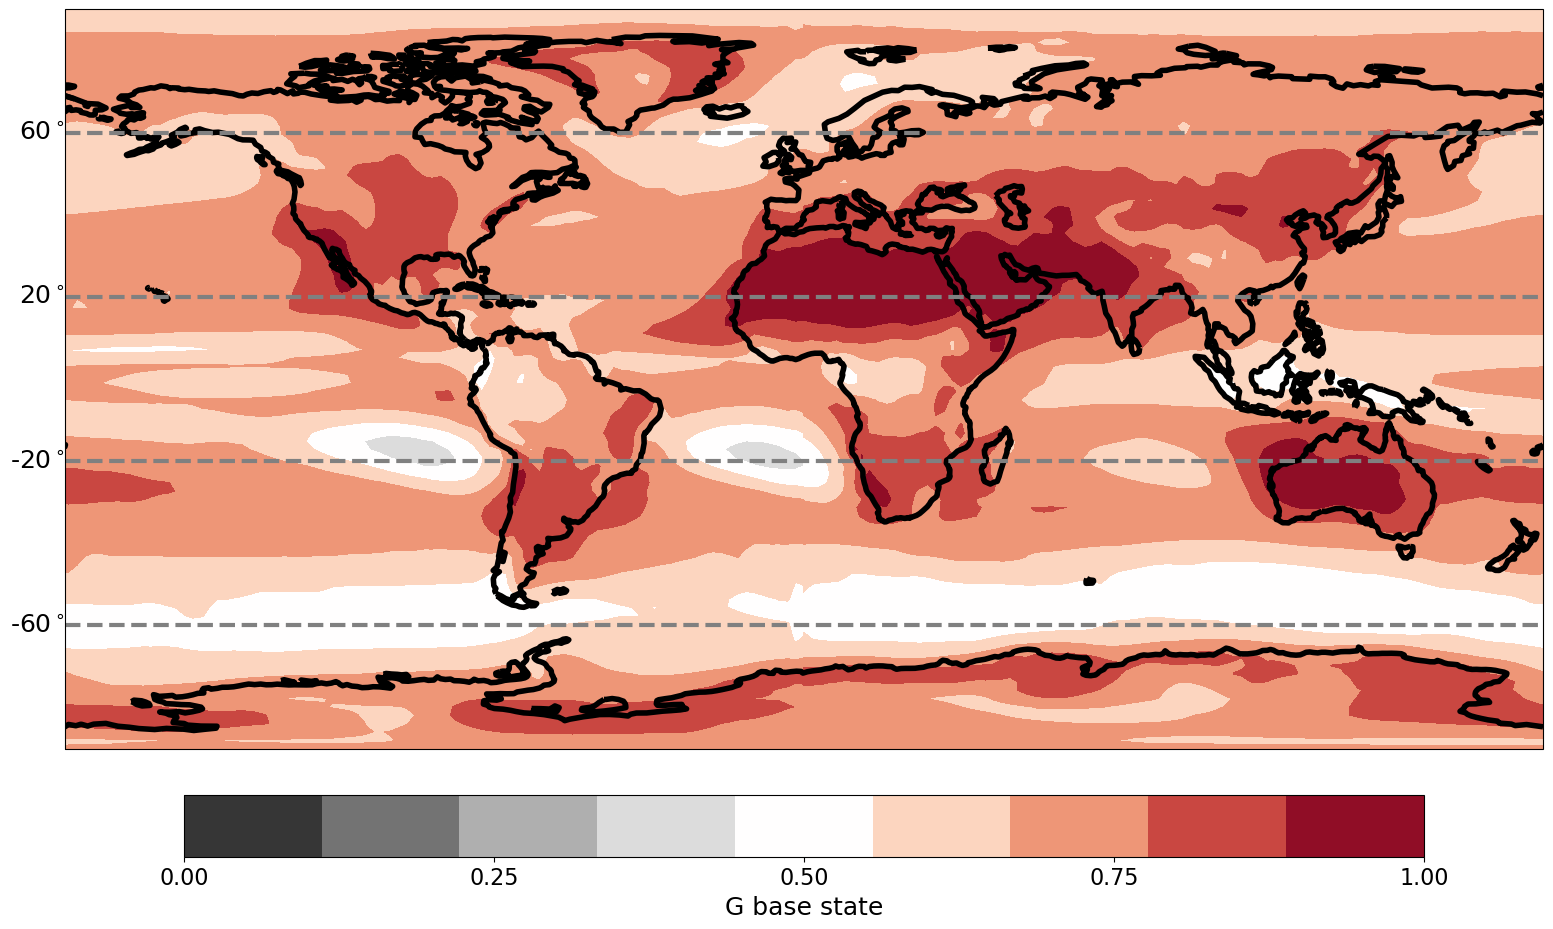

In [7]:


dPdT = np.nanmean(GB_regridded2, axis=0)


projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw=dict(projection=projection))
#dPdT[dPdT>.010]=.010
#dPdT[dPdT<-.010]=-.010

ax.add_feature(cfeature.COASTLINE)
levels = np.linspace(0, 1,10) 

# Plot the trend data with statistical significance
lon = np.linspace(0, 360, dPdT.shape[1])
lat = np.linspace(-90, 90, dPdT.shape[0])
lon, lat = np.meshgrid(lon, lat)

dPdT[:,179]=(dPdT[:,0]+dPdT[:,178])/2

#dPdT[:,0]=(dPdT[:,1]+dPdT[:,178])/2
# Plot the trends

#plt.pcolor(lon, lat, dPdT )
im = plt.contourf(lon, lat, dPdT , levels=levels, cmap='RdGy_r', origin='lower', transform=projection , extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[0, 0.25, 0.5, 0.75, 1])  # Customized ticks

# Enlarge colorbar text size
cbar.ax.tick_params(labelsize=16)

cbar.set_label('G base state', fontsize=18) 
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=4)  # You can adjust linewidth and edgecolor as desired
latitudes = [60, 20, -20, -60]
for lat in latitudes:
    ax.axhline(lat, color='grey', linestyle='--', linewidth=3)
    ax.text(-180, lat, f'{lat}$^\circ$', color='black', va='center', ha='right', fontsize=18)
plt.savefig("BaseState_Map_Gt.png", format="png", bbox_inches="tight")   

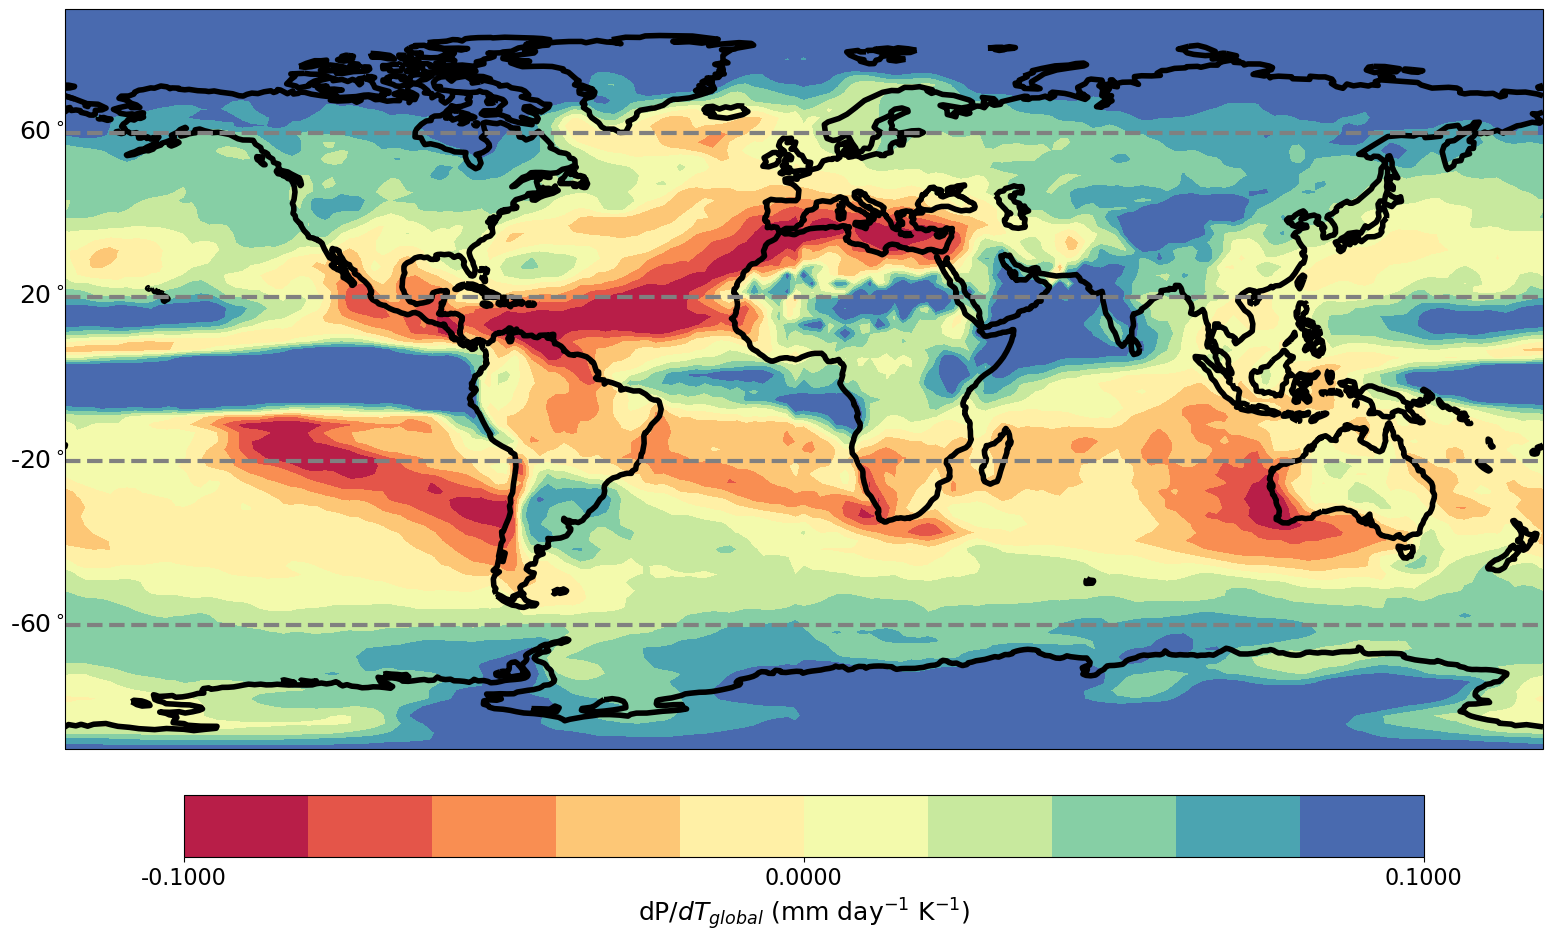

In [120]:
import matplotlib.ticker as ticker

dPdT = P_regridded2/PB_regridded2
dPdT[dPdT>1]=np.nan
dPdT[dPdT<-1]=np.nan
dPdT = np.nanmean(dPdT, axis=0)
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw=dict(projection=projection))
dPdT[dPdT>.1]=.1
dPdT[dPdT<-.1]=-.1
# Add coastlines
ax.add_feature(cfeature.COASTLINE)
levels = np.linspace(-.1, .1,11) 

# Plot the trend data with statistical significance
lon = np.linspace(0, 360, dPdT.shape[1])
lat = np.linspace(-90, 90, dPdT.shape[0])
lon, lat = np.meshgrid(lon, lat)
dPdT[:,179]=dPdT[:,0]
#dPdT[:,0]=(dPdT[:,1]+dPdT[:,178])/2
# Plot the trends

#plt.pcolor(lon, lat, dPdT )
im = plt.contourf(lon, lat, dPdT , levels=levels, cmap='Spectral', origin='lower', transform=projection , extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[-.1, -0.5, 0, 0.5, .1])  # Customized ticks

# Enlarge colorbar text size
cbar.ax.tick_params(labelsize=16)

cbar.set_label('dP/$dT_{global}$ (mm day$^{-1}$ K$^{-1}$)', fontsize=18) 
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=4)  # You can adjust linewidth and edgecolor as desired
cbar.ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))
latitudes = [60, 20, -20, -60]
for lat in latitudes:
    ax.axhline(lat, color='grey', linestyle='--', linewidth=3)
    ax.text(-180, lat, f'{lat}$^\circ$', color='black', va='center', ha='right', fontsize=18)
plt.savefig("Trend_Map_Pfraction.png", format="png", bbox_inches="tight")   

In [115]:
dPdT

array([[0.08995501, 0.08996052, 0.08996329, ..., 0.08995298, 0.1       ,
        0.0949775 ],
       [0.08936305, 0.09122073, 0.09139098, ..., 0.08993342, 0.0953087 ,
        0.09233588],
       [0.08892245, 0.08886598, 0.08941227, ..., 0.08711283, 0.08589648,
        0.08740947],
       ...,
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ]])

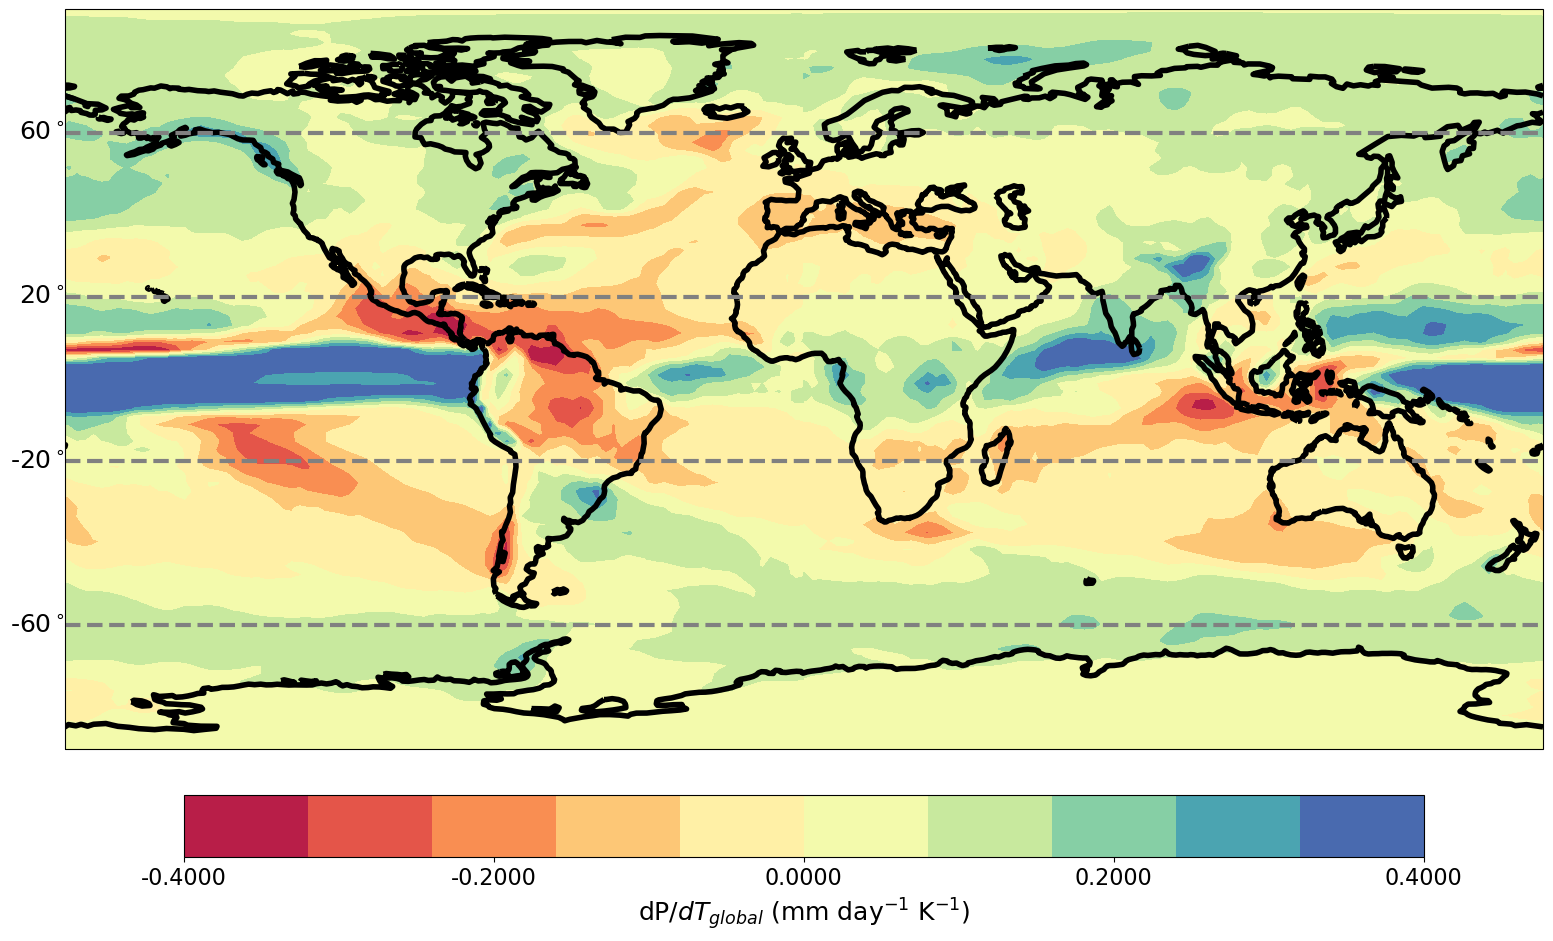

In [53]:
import matplotlib.ticker as ticker
dPdT = np.nanmean(P_regridded2, axis=0)
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw=dict(projection=projection))
dPdT[dPdT>.4]=.4
dPdT[dPdT<-.4]=-.4
# Add coastlines
ax.add_feature(cfeature.COASTLINE)
levels = np.linspace(-.4, .4,11) 

# Plot the trend data with statistical significance
lon = np.linspace(0, 360, dPdT.shape[1])
lat = np.linspace(-90, 90, dPdT.shape[0])
lon, lat = np.meshgrid(lon, lat)
dPdT[:,179]=(dPdT[:,0]+dPdT[:,178])/2
#dPdT[:,0]=(dPdT[:,1]+dPdT[:,178])/2
# Plot the trends

#plt.pcolor(lon, lat, dPdT )
im = plt.contourf(lon, lat, dPdT , levels=levels, cmap='Spectral', origin='lower', transform=projection , extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[-.4, -0.2, 0, 0.2, .4])  # Customized ticks

# Enlarge colorbar text size
cbar.ax.tick_params(labelsize=16)

cbar.set_label('dP/$dT_{global}$ (mm day$^{-1}$ K$^{-1}$)', fontsize=18) 
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=4)  # You can adjust linewidth and edgecolor as desired
cbar.ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))
latitudes = [60, 20, -20, -60]
for lat in latitudes:
    ax.axhline(lat, color='grey', linestyle='--', linewidth=3)
    ax.text(-180, lat, f'{lat}$^\circ$', color='black', va='center', ha='right', fontsize=18)
plt.savefig("Trend_Map_P.png", format="png", bbox_inches="tight")   

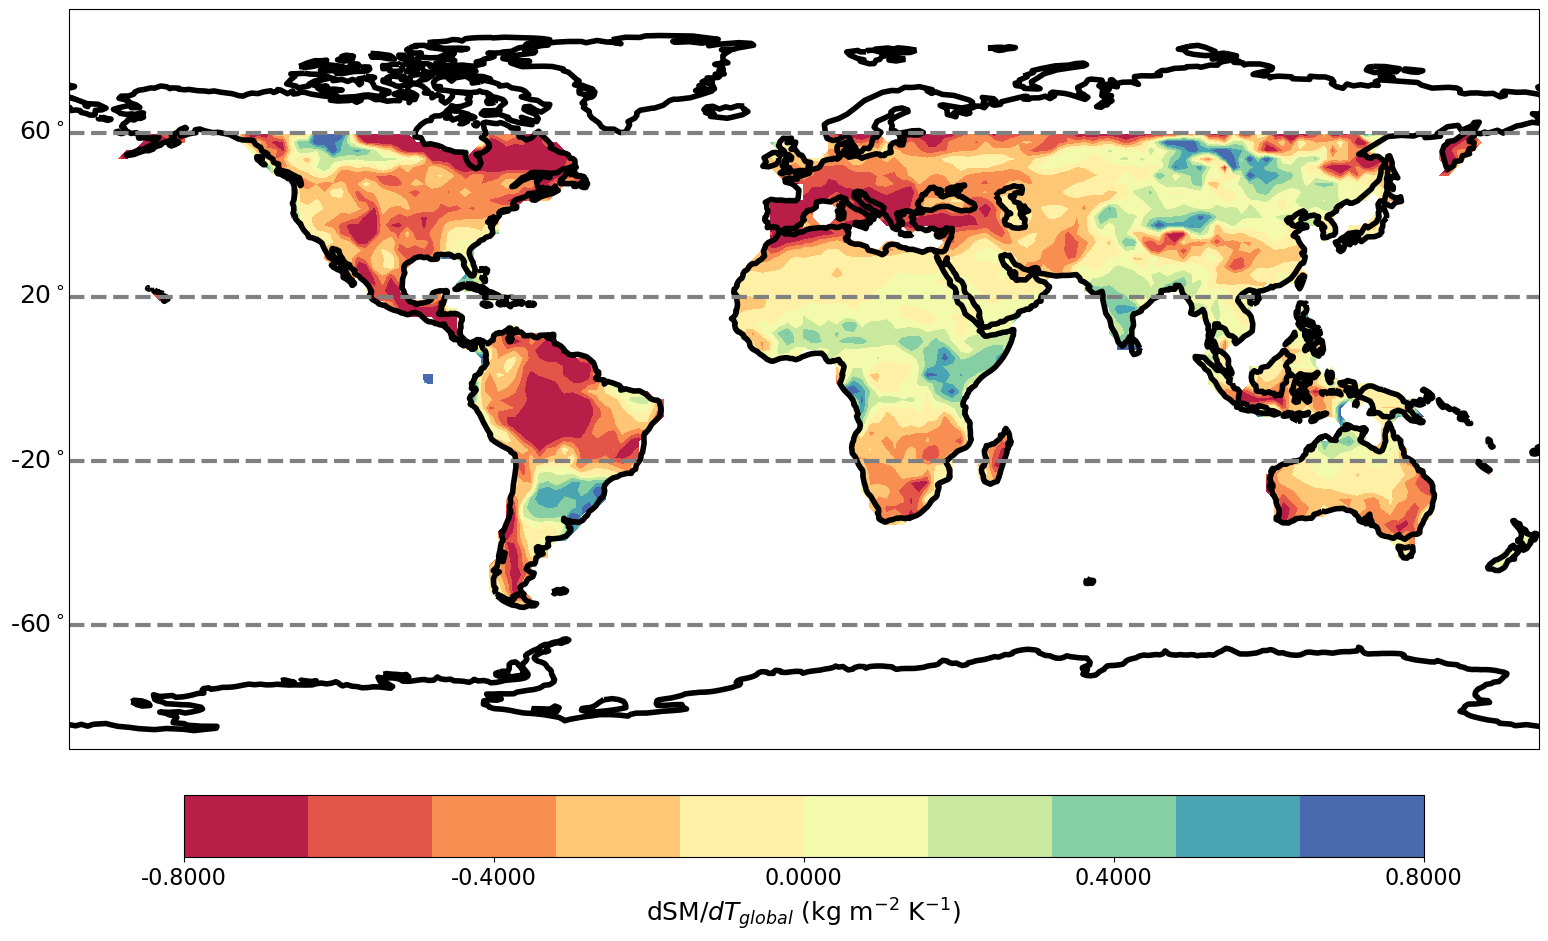

In [52]:
import matplotlib.ticker as ticker
dPdT = np.nanmean(SM_regridded2, axis=0)
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20, 12), subplot_kw=dict(projection=projection))
dPdT[dPdT>.8]=.8
dPdT[dPdT<-.8]=-.8
# Add coastlines
ax.add_feature(cfeature.COASTLINE)
levels = np.linspace(-.8, .8,11) 

# Plot the trend data with statistical significance
lon = np.linspace(0, 360, dPdT.shape[1])
lat = np.linspace(-90, 90, dPdT.shape[0])
lon, lat = np.meshgrid(lon, lat)
dPdT[:,179]=(dPdT[:,0]+dPdT[:,178])/2
#dPdT[:,0]=(dPdT[:,1]+dPdT[:,178])/2
# Plot the trends

#plt.pcolor(lon, lat, dPdT )
im = plt.contourf(lon, lat, dPdT , levels=levels, cmap='Spectral', origin='lower', transform=projection , extent=[-180, 180, -90, 90])
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, shrink=0.8, ticks=[-.8, -0.4, 0, 0.4, .8])  # Customized ticks

# Enlarge colorbar text size
cbar.ax.tick_params(labelsize=16)

cbar.set_label('dSM/$dT_{global}$ (kg m$^{-2}$ K$^{-1}$)', fontsize=18) 
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=4)  # You can adjust linewidth and edgecolor as desired
cbar.ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.4f}"))
latitudes = [60, 20, -20, -60]
for lat in latitudes:
    ax.axhline(lat, color='grey', linestyle='--', linewidth=3)
    ax.text(-180, lat, f'{lat}$^\circ$', color='black', va='center', ha='right', fontsize=18)
plt.savefig("Trend_Map_SM.png", format="png", bbox_inches="tight")   

In [3]:
from sklearn.linear_model import LinearRegression
P_regridded2 = np.full((10, 90, 180), np.nan)
SM_regridded2 = np.full((10, 90, 180), np.nan)
G_regridded2 = np.full((10, 90, 180), np.nan)
SMB_regridded2 = np.full((10, 90, 180), np.nan)
PB_regridded2 = np.full((10, 90, 180), np.nan)
GB_regridded2 = np.full((10, 90, 180), np.nan)

for model in range(10):
    data3 = xr.open_dataset('/scratch/cimes/hh9736/CMIP6_pr/' + model_names[model] + MASK[model])

    G_trend = np.load('/scratch/cimes/hh9736/CMIP6_pr/Temporal_inequality/Trend_GINI_' + model_names[model] + '.npy')
    P_trend = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/Trend_P_' + model_names[model] + '.npy')
    SM_trend = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/Trend_SM_' + model_names[model] + '.npy')

    #GINI_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Temporal_inequality/BaseState_GINI_' + model_names[model] + '.npy')
    P_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/BaseState_P_' + model_names[model] + '.npy')
    SM_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Analysis/BaseState_SM_' + model_names[model] + '.npy')
    G_BaseState = np.load('/scratch/cimes/hh9736/CMIP6_pr/Temporal_inequality/BaseState_GINI_' + model_names[model] + '.npy')
    
    filename = f'/scratch/cimes/hh9736/CMIP6_pr/Analysis/Spatial_mean_T_ts_' + model_names[model] + '.npy'
    arrT = np.load(filename)
    arrT = arrT[0,:]-arrT[0,0]
    years = np.arange(1, 101).reshape(-1, 1)
    SM_trend[SM_trend==0]=np.nan
    P_trend[P_trend>1000]=np.nan
    P_trend[P_trend<-1000]=np.nan
    SM_trend[0,0:round(SM_trend.shape[1]/6),:]=np.nan
    SM_trend[0,round(5*SM_trend.shape[1]/6):SM_trend.shape[1],:]=np.nan    
    
    # Reshape arrT to a column vector
    arrT_reshaped = arrT.reshape(-1, 1)

    # Create a linear regression model
    model1 = LinearRegression()

    # Fit the model to your data
    model1.fit(years, arrT_reshaped)

    # Get the slope (trend) and intercept of the fitted line
    T_trend = model1.coef_[0][0]
    
    
    lats = data3['lat'].values
    lons = data3['lon'].values-180
    lon_new = np.linspace(-180, 180, 180)
    lat_new = np.linspace(-90, 90, 90)
    # Assuming P is your original 2D numpy array
    # Define the original latitudes and longitudes (lon and lat should be 1D arrays)
    lat_original = lats  # Replace with your original longitudes
    lon_original = lons  # Replace with your original latitudes
    new_grid = xr.Dataset({'lon': (['lon'], lon_new), 'lat': (['lat'], lat_new)})

    data_array = xr.DataArray(P_trend[0,:,:]/T_trend, coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    P_regridded2[model] = regridded_data.values
    
    data_array = xr.DataArray(SM_trend[0,:,:]/T_trend, coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    SM_regridded2[model] = regridded_data.values
    
    data_array = xr.DataArray(G_trend[0,:,:]/T_trend, coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    G_regridded2[model] = regridded_data.values
    
    data_array = xr.DataArray(SM_BaseState[0,:,:], coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    SMB_regridded2[model] = regridded_data.values    
    
    data_array = xr.DataArray(P_BaseState[0,:,:], coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    PB_regridded2[model] = regridded_data.values    

    data_array = xr.DataArray(G_BaseState[0,:,:], coords=[('lat', lat_original), ('lon', lon_original)])
    regridded_data = data_array.interp(lon=new_grid['lon'], lat=new_grid['lat'], method='linear')
    GB_regridded2[model] = regridded_data.values    
    

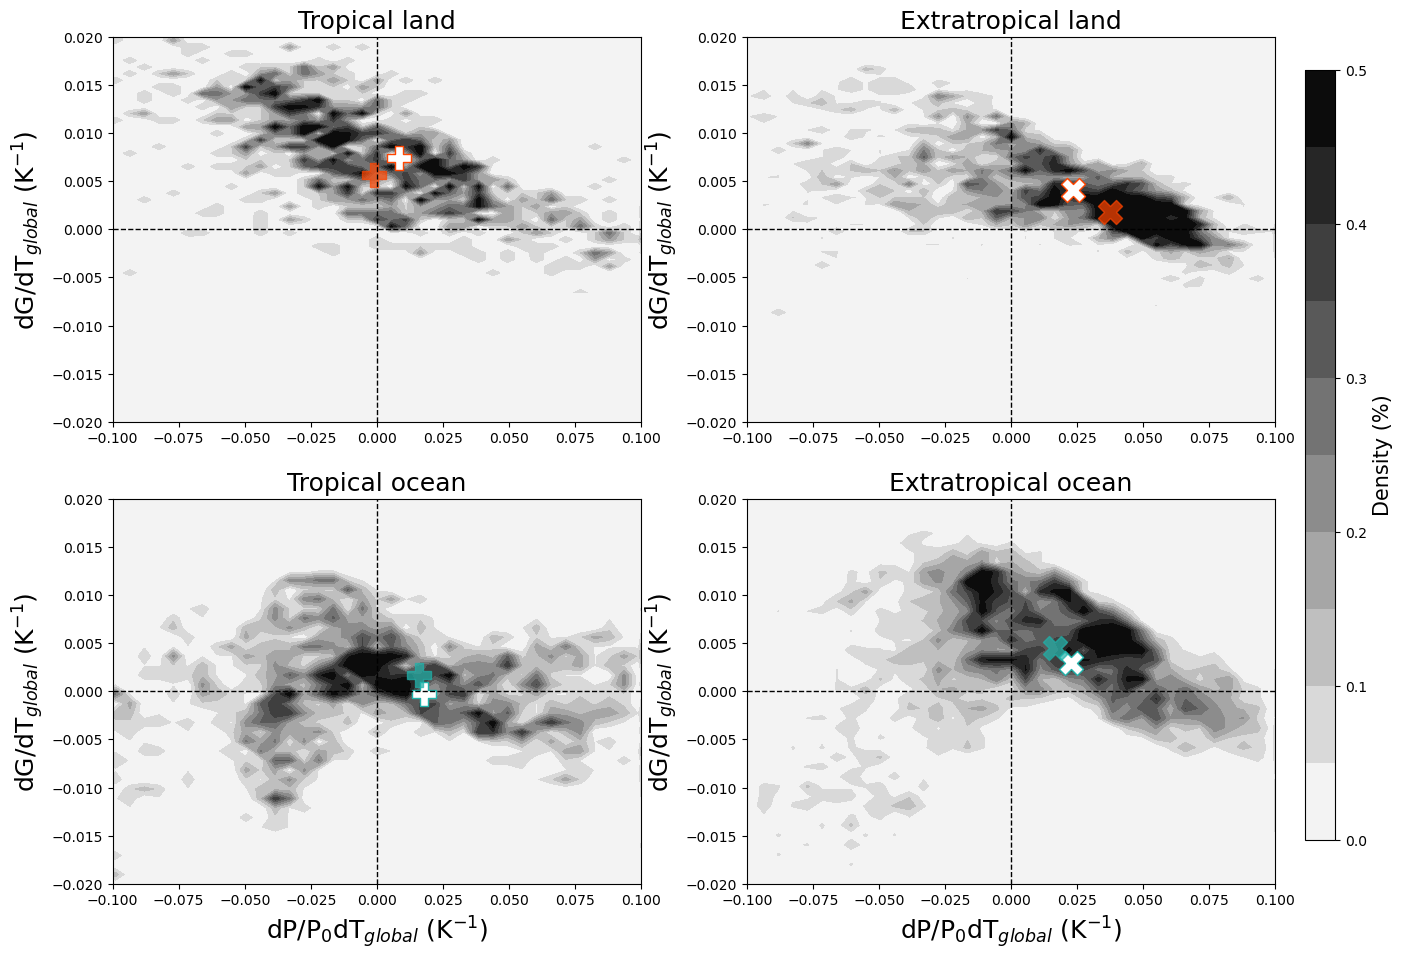

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define your model_names array here
fig, axs = plt.subplots(2, 2, figsize=(15, 11))


colors = ['orangered','lightseagreen','#556B2F']
marker = ["P","X","o"]
# Assuming dP, dG, and dSM are your data arrays
# Example data:
for surf in range(0,2):
    for regi in range(0,2):

        dP = np.nanmean(P_regridded2/PB_regridded2, axis=0)
        dSM = np.nanmean(SM_regridded2, axis=0)
        dG = np.nanmean(G_regridded2, axis=0)


        # Define the quadrant boundaries
        x_threshold = 0
        y_threshold = 0
        if surf < 1:
            dP[np.isnan(dSM)]=np.nan
            dG[np.isnan(dSM)]=np.nan
        if surf > 0:
            dP[~np.isnan(dSM)]=np.nan
            dG[~np.isnan(dSM)]=np.nan
        if regi < 1:
            dP[0:35,:]=np.nan
            dP[55:90,]=np.nan    
        if regi > 0:
            dP[35:55,:]=np.nan
        # Calculate the number of samples in each quadrant
        dP[dP>.3]=np.nan
        dP[dP<-.3]=np.nan
        latitude = np.linspace(-90, 90, dP.shape[0])

        # Calculate the weight matrix based on the cosine of latitude
        weight_matrix = np.outer(np.cos(np.radians(latitude)), np.ones(dP.shape[1]))

     
                   

        mask = ~np.isnan(dP) & ~np.isnan(dG)
        
        dP = dP[mask]
        dG = dG[mask]
        weight_matrix = weight_matrix[mask]
        
        weight_dP = np.sum(dP*weight_matrix)/np.sum(weight_matrix)
        weight_dG = np.sum(dG*weight_matrix)/np.sum(weight_matrix)

        
        dP_cleaned = copy(dP)
        dG_cleaned = copy(dG)
        
        dP_cleaned[dP_cleaned>0.1]=0.11
        dP_cleaned[dP_cleaned<-0.1]=-0.11
        
        dG_cleaned[dG_cleaned>0.02]=0.021
        dG_cleaned[dG_cleaned<-0.02]=-0.021
        # Assuming predictor and dG are your data arrays
        # If not, replace them with your actual data arrays
        W = weight_matrix
   
        # Create a 2D histogram
        hist, xedges, yedges = np.histogram2d(dP_cleaned.flatten(), dG_cleaned.flatten(), bins=(40, 40), density=True,weights=W.flatten())
        hist=hist/np.nansum(hist)*100
        vmin, vmax = 0, 0.5  # You can adjust the range according to your data

        hist[hist>vmax]=vmax
        hist[hist==0]=0
        hist[np.isnan(hist)]=0
        # Create a density scatter plot using pcolormesh with specified color scale range
        #im=axs[surf,regi].pcolormesh(xedges, yedges, hist.T, cmap='binary', vmin=vmin, vmax=vmax)
        #im=axs[surf,regi].(xedges, yedges, hist.T, cmap='binary', vmin=vmin, vmax=vmax)
        im=axs[surf,regi].contourf(xedges[0:40], yedges[0:40], hist.T, cmap='binary', levels=np.linspace(vmin, vmax, 11))
        #dP[dP>.1]=np.nan
        
        axs[surf,regi].scatter(weight_dP,weight_dG, s=300, color='white', marker=marker[regi], edgecolor=colors[surf])
    # Create a density scatter plot using pcolormesh

        # Set axis limits
        axs[surf,regi].set_xlim([-.1, .1])
        axs[surf,regi].set_ylim([-0.02, 0.02])
        axs[surf,regi].axvline(0, color='black', linestyle='--', linewidth=1)
        axs[surf,regi].axhline(0, color='black', linestyle='--', linewidth=1)
        #axs[surf,regi].colorbar(label='Density')
        your_colormap = plt.cm.binary  # Replace with your actual colormap

# Extract the color of the first color in the colormap
        axs[surf, regi].set_facecolor(your_colormap(0.05))
        axs[1,0].set_xlabel('dP/P$_0$dT$_{global}$ (K$^{-1}$)',fontsize=18)
        axs[1,1].set_xlabel('dP/P$_0$dT$_{global}$ (K$^{-1}$)',fontsize=18)

        axs[surf,regi].set_ylabel('dG/dT$_{global}$ (K$^{-1}$)',fontsize=18)        
      #  plt.xticks([-0.1, -0.05, 0, 0.05, 0.1], fontsize=15)
     #   plt.yticks([-0.01, 0, 0.01, 0.02], fontsize=15)
        # Show the plot
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [x, y, width, height]
# Add the colorbar to the current subplot using the colorbar axis
cbar = plt.colorbar(im, cax=cbar_ax)
# Customize colorbar labels and other properties as needed
cbar.set_label('Density (%)',fontsize=15)


zone = ['30','3090','90']
surf = ['land','ocean','glob']
zonen = ['Tropical','Extratropical','Whole']
surfn = ['land','ocean','globe']
sc = ['yearly (100 years)','monthly (1200 months)','10-days (3650 10-days)','daily (36500 days)']
timescale = ['','m','w','d']
tlen = [100,100,100,100]
nm = [20,20,10,10]
Ttrend=np.zeros(20)
dPdTslope=np.zeros(10)
for model in range(0,20):
    filename = f'/scratch/cimes/hh9736/CMIP6_pr/Analysis/Spatial_mean_T_ts_' + model_names[model] + '.npy'
    arr = np.load(filename)
    trend = np.polyfit(np.arange(100), arr[0,0:100], deg=1)
    Ttrend[model] = trend[0]
for tsl in range(3,4):
    for sf in range(0,2):
        for zo in range(0,2):
            
            filename = "/scratch/cimes/hh9736/CMIP6_pr/Spatial_unevenness/"+ timescale[tsl] +"GINI_trend_spa_"+ zone[zo] +""+ surf[sf] +"P_.npy"
            
            arr = np.load(filename)
            # Assuming arr is your data with two points
            data2 = arr[0, 0:nm[tsl]]/Ttrend[0:nm[tsl]] 
            data = arr[1, 0:nm[tsl]]
            t_statistic, p_value = stats.ttest_1samp(data2, 0)
          

            # Calculate the mean and standard deviation
            mean2 = np.mean(data2)
            std_dev2 = np.std(data2)
            confidence_level = 0.95  # You can adjust this as needed
            ci = stats.norm.interval(confidence_level, loc=mean2, scale=std_dev2/np.sqrt(len(data2)))

            # Calculate the standard error (assuming two data points)
            alpha_value = 0.5
            
            for model in range(0,10):
                filename = f'/scratch/cimes/hh9736/CMIP6_pr/Analysis/Spatial_mean_ts_'+ surf[sf] +''+ zone[zo] +'_' + model_names[model] + '.npy'
                arr = np.load(filename)
                coefficients = np.polyfit(arrT, (arr[0,:]-np.nanmean(arr[0,:]))/np.nanmean(arr[0,:]), deg=1)
                slope, intercept = coefficients
                dPdTslope[model]=slope
            
            axs[sf,zo].scatter(np.mean(dPdTslope),mean2,s=300, marker=marker[zo], color=colors[sf] , alpha=0.7)
            axs[sf,zo].set_title(f"{zonen[zo]} {surf[sf]}",fontsize=18)
plt.savefig("scatter_density_dP_dG.png", format="png", bbox_inches="tight")   
